### SVM(Support Vector Machine)
인공신경망이 딥러닝을 통해 인공지능 분야의 중심으로 떠오르기 전 가장 각광받던 학습 방법이다.
+ 두 데이터 그룹을 나누는 초평면(hyperplane)을 찾으면서 그 폭(margin)이 가장 넓은 것을 찾는다.
+ Hard margin : 마진 내에 어떠한 데이터도 들어오지 않아야 함 => 잡음에 민감 => 과적합에 취약
+ Soft margin : 일부 데이터가 마진 내에 들어오게 허용함 => 개수 제어 가능(slack 변수)
+ 하드, 소프트 모두 마진을 최대로 넓게 많들려고 하기 때문에  
마진의 양쪽에는 서로 다른 데이터 그룹에 속하는 데이터들이 하나씩 닿아있게 되는데, 이것들을 서포트 벡터라고 한다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://github.com/dknife/ML/raw/main/data/two_classes.csv'
df = pd.read_csv(url)
df.tail()   #y는 0, 1 라벨

,x1,x2,y
995,2.664896,-1.955326,0
996,-2.019928,0.334542,1
997,-4.634470,0.300158,1
998,1.426275,-2.765590,0
999,1.988053,1.466494,0


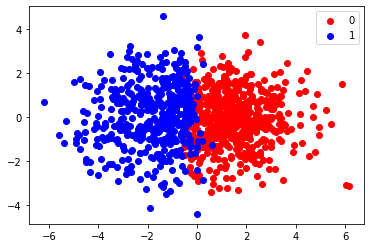

In [3]:
df_0 = df[df.y == 0]
df_1 = df[df.y == 1]

plt.scatter(df_0['x1'], df_0['x2'], color='r', label='0')
plt.scatter(df_1['x1'], df_1['x2'], color='b', label='1')
plt.legend();

In [4]:
from sklearn.svm import LinearSVC

X = df[['x1', 'x2']].to_numpy()  #(1000, 2)
y = df['y']                      #(1000, )

model = LinearSVC(C=1, loss='hinge')  #C:slack 변수 최적화의 가중치(작을수록 하드 마진에 가까워짐), loss:hinge(max(0,1-h)), squared_hinge 두가지만 가능
model.fit(X, y)

LinearSVC(C=1, loss='hinge')

In [5]:
new_data = [[0.12, 0.56], [-4, 40], [0, 40], [5, 20]]

pred = model.predict(new_data)
pred

array([0, 1, 1, 0], dtype=int64)

In [6]:
#!pip install yellowbrick

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


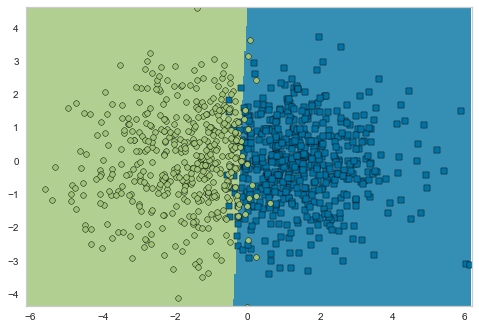

In [7]:
from yellowbrick.contrib.classifier import DecisionViz

graph = DecisionViz(model, title='linear SVM')
graph.fit(X, y)
graph.draw(X, y)

SVM은 데이터 값의 크기에 민감하기 때문에, 데이터 정제(정규화, 표준화 등)가 필요하다.  
=> sklearn 패키지의 pipeline 사용
+ pipeline은 학습을 위한 머신러닝 알고리즘 클래스를 생성할 때, 데이터를 전처리하는 과정을 포함하도록 도와준다.
+ 데이터 표준화, 비선형 모델 생성을 위한 전처리 과정이 포함된다.
+ 파이프라인은 리스트 안에 처리과정들을 담으면 된다.
+ 각 처리과정은 튜플 안에 (이름, 객체)를 담으면 된다.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('std', StandardScaler()),   
                 ('lsvm', LinearSVC(C=1, loss='hinge'))])
pipe.fit(X, y)

Pipeline(steps=[('std', StandardScaler()),
                ('lsvm', LinearSVC(C=1, loss='hinge'))])

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


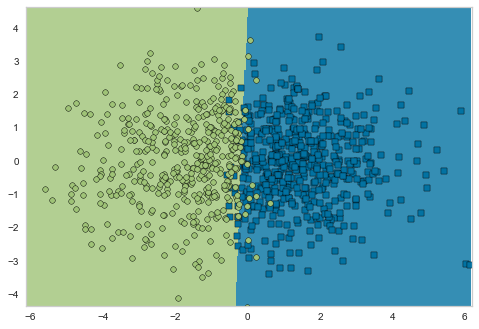

In [9]:
graph = DecisionViz(pipe, title='Standardization - SVM')
graph.fit(X, y)
graph.draw(X, y)

다항회귀에서 사용했던 PolynomialFeatures 메소드는 데이터 정제 메소드로, 학습 알고리즘에 관계없이 사용할 수 있다.  
입력 특성이 x 하나일 때, 2차 다항특징변환을 수행한다면 x^2, x의 두가지 특성을 사용할 수 있게 된다.  
=> Pipeline에 PolynomialFeatures 도 추가해보자

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become 

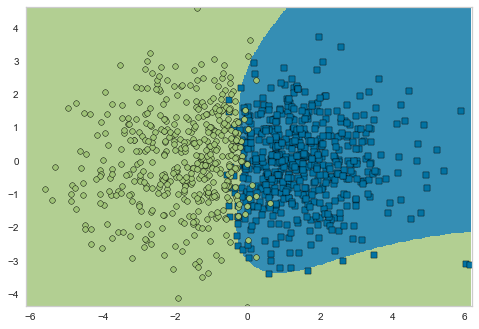

In [10]:
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([('std', StandardScaler()),                     #입력데이터 표준화 후 
                 ('poly_inputs', PolynomialFeatures(degree=5)), #5차원 다항특징변환 후
                 ('lsvm', LinearSVC(C=1, loss='hinge')),])      #모델학습 적용
pipe.fit(X, y)

graph = DecisionViz(pipe, title='Standardization - SVM')
graph.fit(X, y)
graph.draw(X, y)    #경계선은 5차원 입력값에서 얻어지는 초평면으로, 원래의 입력공간에서는 직선이 아닌 비선형 경계로 표시됨

### Quiz.
선형분리가 불가능하도록 섞여있는 두 종류의 데이터 인스턴스들을 분류할 수 있도록 SVM을 학습시켜 보자.

In [11]:
url = 'https://github.com/dknife/ML/raw/main/data/twisted_data.csv'
df = pd.read_csv(url)
df.head()

,x1,x2,y
0,-0.708553,-0.648847,0
1,0.326029,-0.551734,0
2,-3.105980,0.149616,0
3,-0.529565,-0.812004,0
4,2.837286,-0.176169,1


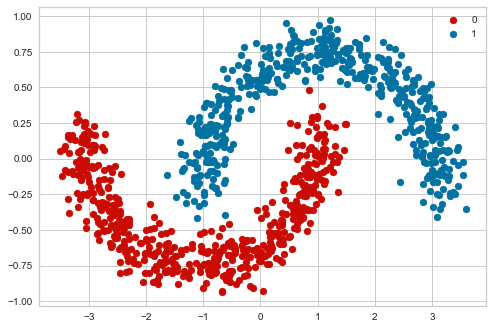

In [12]:
df_0 = df[df.y == 0]
df_1 = df[df.y == 1]

plt.scatter(df_0['x1'], df_0['x2'], color='r', label='0')
plt.scatter(df_1['x1'], df_1['x2'], color='b', label='1')
plt.legend();

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


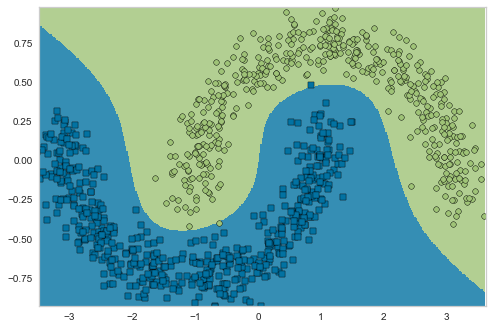

In [13]:
X = df[['x1', 'x2']].to_numpy()
y = df['y']

pipe = Pipeline([('scaler', StandardScaler()),
                 ('poly_features', PolynomialFeatures(degree=5)),
                 ('model', LinearSVC(C=1, loss='hinge'))])
pipe.fit(X, y)

graph = DecisionViz(pipe, title='Polynomial feature - SVM')
graph.fit(X, y)
graph.draw(X, y) 

## 커널 트릭(kernel trick)
다항특징변환을 통해 비선형 분류가 가능했지만, 차수가 높아질수록 입력벡터의 차원이 급격히 높아졌다.  
이것은 학습 속도를 떨어뜨리고, 전체적인 성능 저하를 가져올 수밖에 없다.  
SVM은 이런 문제를 피하고 효율적인 비선형 분류를 하기 위해 커널 트릭이라는 것을 사용할 수 있다.
+ 쌍대문제에서 특징 데이터의 차원이 증가해도 내적 계산 시간이 증가하지 않도록 하는 트릭
+ 다항특징변환으로 얻는 고차원 데이터를 사용하는 것이 아니라, 원래의 입력들 사이의 내적을 구한 뒤 그 결과를 제곱해도 결과는 동일
+ 변환된 벡터의 내적을 원래의 벡터만으로 구할 수 있는 함수를 커널 함수라 부름

커널 트릭은 학습 알고리즘 내에서 이루어지는 것이므로 데이터 정제 과정에서 특징 벡터를 변환하지 않아도 되고,  
SVM 클래스를 생성할 때 사용할 커널을 지정하면 된다.

C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\yellowbrick\contrib\classifier\boundaries.py:435: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.ax.pcolormesh(


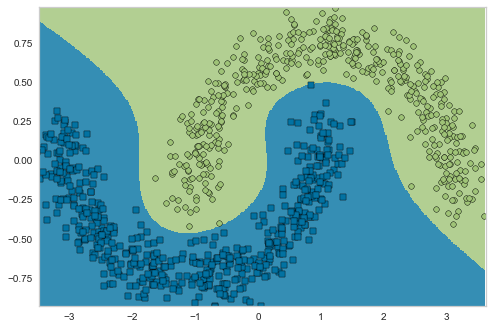

In [15]:
from sklearn.svm import SVC

url = 'https://github.com/dknife/ML/raw/main/data/twisted_data.csv'
df = pd.read_csv(url)

X = df[['x1', 'x2']].to_numpy()
y = df['y']

pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(C=10, kernel='poly', degree=4, coef0=2))])
pipe.fit(X, y)

graph = DecisionViz(pipe, title='Polynomial feature SVM')
graph.fit(X, y)
graph.draw(X, y)

### Quiz.
SVM을 이용해 주어진 이미지가 사람의 얼굴인지 아닌지 구분해보자.

In [25]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog   #이미지 영역별로 쪼개고, 해당 영역내 픽셀 기울기의 히스토그램을 구하는 함수

url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_data = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64, 64))  #이미지 크기를 (64, 64)로 통일
    face_data.append(img)
    
face_data[0].shape

(64, 64, 3)

<Figure size 576x396 with 0 Axes>

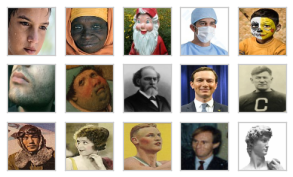

In [37]:
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize=(nCol, nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1:
                axis = ax[j]
            else:
                axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol + j])
            
plot_images(3, 5, face_data)

#### 얼굴 이미지의 특징 데이터 구하기
위 15개 이미지를 SVM이 학습할 정(positive) 그룹 데이터로 사용할 것이다.  
하지만 이미지의 색상 등 중요하지 않은 특징들이 학습을 방해할 수 있기 때문에,  
현재 데이터 그대로 사용하는 것은 별로 바람직하지 않다.  
따라서 이미지의 중요한 특징을 추출하기 위해 이미지의 기울기 히스토그램을 사용할 수 있다.  
=> skimage.feature 의 hog 함수 사용  
##### hog_descriptor, hog_visual = hog(img, n_orientation, block_size, ...)
+ img : 이미지 입력
+ n_orientation : 지정된 수만큼의 방향으로 나누어 각 방향의 빈도 계산
+ block_size : 빈도 계산은 블록 단위로 이루어지는데, 그 블록의 크기를 지정
+ hog_descriptor : 각 블록 내 n_orientation 방향 각각의 비율을 나타내는 수치 값 반환
+ hog_visual : 각 블록별 히스토그램을 가시화한 결과 반환

<Figure size 576x396 with 0 Axes>

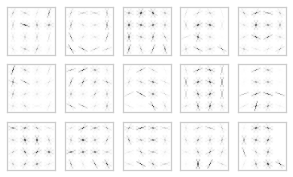

In [45]:
face_features, face_imgs = [], []

for i in range(15):
    hog_desc, hog_img = hog(face_data[i], orientations=8,                       #히스토그램을 8개 방향의 기울기로 생성
                            pixels_per_cell=(16, 16), cells_per_block=(1, 1),   #(64, 64)이미지를 (16, 16)사이즈 블록 16개로 나눔
                            visualize=True, channel_axis=-1)                    #히스토그램 가시화 이미지 생성 True, 흑백일 땐 channel_axis=None, 컬러일 땐 -1
    face_imgs.append(hog_img)
    face_features.append(hog_desc)

plot_images(3, 5, face_imgs)     #이미지 1개 = 블록 16개, 블록 1개 = 픽셀 16*16개, 각 픽셀마다 기울기를 가짐

In [46]:
face_features[0].shape    #한 블록당 8개 방향의 정보 * 블록 16개 => (128, 1)인 1차원 벡터이자, 128x1의 이미지

(128,)

<Figure size 576x396 with 0 Axes>

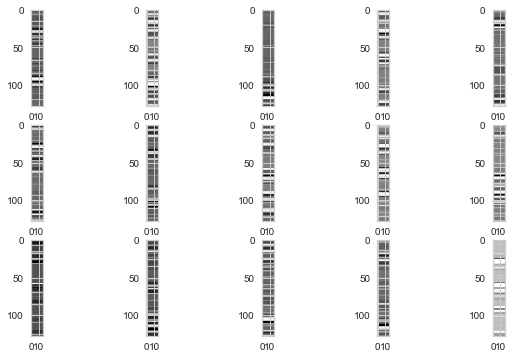

In [48]:
#128x1 이미지를 육안으로 확인하기 위해 128x16 크기로 변경해 확인
fig = plt.figure()
fig, ax = plt.subplots(3, 5, figsize=(10,6))
for i in range(3):
    for j in range(5):
        ax[i, j].imshow(resize(face_features[i*5+j], (128,16)))   #각 이미지를 설명하는 특징 벡터라고 할 수 있음

### 부(negative) 그룹 데이터로 사용할 동물 이미지
+ 이미지 불러와 hog함수 이용해 특징 추출하기

<Figure size 576x396 with 0 Axes>

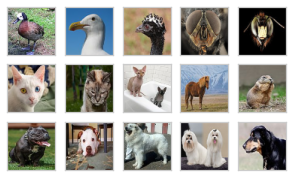

In [49]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'
animal_data = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64, 64))  #이미지 크기를 (64, 64)로 통일
    animal_data.append(img)
    
plot_images(3, 5, animal_data)

<Figure size 576x396 with 0 Axes>

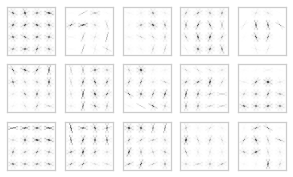

In [50]:
animal_features, animal_imgs = [], []

for i in range(15):
    hog_desc, hog_img = hog(animal_data[i], orientations=8,                     #히스토그램을 8개 방향의 기울기로 생성
                            pixels_per_cell=(16, 16), cells_per_block=(1, 1),   #(64, 64)이미지를 (16, 16)사이즈 블록 16개로 나눔
                            visualize=True, channel_axis=-1)                    #히스토그램 가시화 이미지 생성 True, 흑백일 땐 channel_axis=None, 컬러일 땐 -1
    animal_imgs.append(hog_img)
    animal_features.append(hog_desc)

plot_images(3, 5, animal_imgs)     #이미지 1개 = 블록 16개, 블록 1개 = 픽셀 16*16개, 각 픽셀마다 기울기를 가짐

<Figure size 576x396 with 0 Axes>

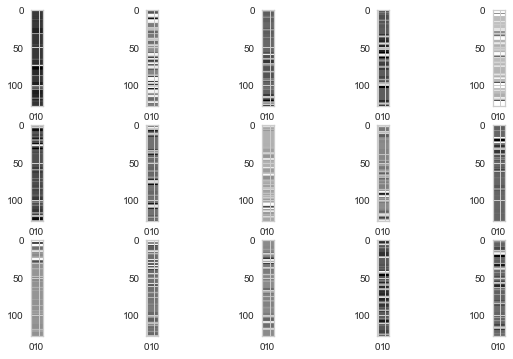

In [51]:
fig = plt.figure()
fig, ax = plt.subplots(3, 5, figsize=(10,6))
for i in range(3):
    for j in range(5):
        ax[i, j].imshow(resize(animal_features[i*5+j], (128,16))) 

#### 모델 학습 준비
+ 사람 얼굴 이미지, 동물 이미지를 모아 입력데이터 X 생성
+ 각각 1, 0 레이블을 지정해 y 생성

In [63]:
X, y = [], []

for i in face_features:
    X.append(i)
    y.append(1)
    
for i in animal_features:
    X.append(i)
    y.append(0)
    
X[0].shape, len(y)

((128,), 30)

In [64]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(C=1, kernel='poly', degree=5, coef0=10.0))])
pipe.fit(X, y)

y_pred = pipe.predict(X)

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

#### 새로운 데이터로 일반화 확인

<Figure size 576x396 with 0 Axes>

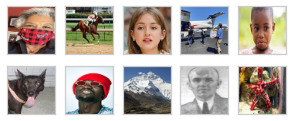

In [65]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_data = []

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    test_data.append(img)
    
plot_images(2, 5, test_data)   #정답은 [1,0,1,0,1,0,1,0,1,0]

<Figure size 576x396 with 0 Axes>

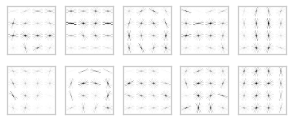

In [69]:
test_features, test_imgs = [], []

for i in range(10):
    hog_desc, hog_img = hog(test_data[i], orientations=8,                   
                            pixels_per_cell=(16, 16), cells_per_block=(1, 1),  
                            visualize=True, channel_axis=-1)                  
    test_imgs.append(hog_img)
    test_features.append(hog_desc)

plot_images(2, 5, test_imgs) 

In [70]:
test_pred = pipe.predict(test_features)

test_pred   #3개 틀림

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0])

<Figure size 576x396 with 0 Axes>

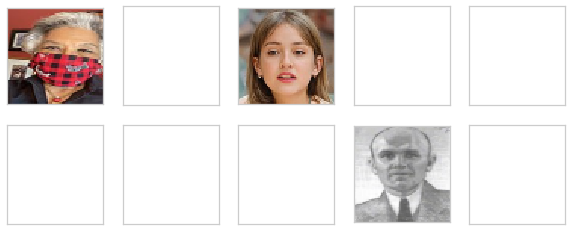

In [73]:
fig = plt.figure()
fig, ax = plt.subplots(2, 5, figsize=(10,4))
for i in range(2):
    for j in range(5):
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        if test_pred[i*5+j] == 1:   #사람 얼굴이라고 분류했다면
            ax[i,j].imshow(test_data[i*5+j], interpolation='nearest')   #이미지 보간법으로 nearest 지정